# Simulación de tiro parabólico: un balón

**EN C++:**

In [74]:
%%writefile Balon.cpp

// Librerías y nombre de espacio:

#include <iostream>
#include <cmath>
using namespace std;

// Constantes globales:

const double g=9.8;

//-----------------------------------------------------------------------------------------

// Declaración de la clase:

class Cuerpo;

// Declaración de la interfase (clase y funciones):

class Cuerpo{
  private:    /* Datos de mi clase cuerpo - Privado */
    double x, y, Vx, Vy, Fx, Fy, m, R;
  public:     /* Las instrucciones que recibe mi clase cuerpo - Público */
    void Inicie(double x0, double y0, double Vx0, double Vy0, double m0, double R0);
    /* Esta función sólo copia los datos dentro de las variables internas */
    void CalculeFuerza(void);  /* Crea las componentes de la fuerza que somete al cuerpo */
    void Muevase(double dt);
    double Getx(void){return x;};   // Inline
    double Gety(void){return y;};   // Inline
};

// Implementación de las funciones:

void Cuerpo::Inicie(double x0, double y0, double Vx0, double Vy0, double m0, double R0){
  x=x0; y=y0; Vx=Vx0; Vy=Vy0; m=m0; R=R0;
}
void Cuerpo::CalculeFuerza(void){
  Fx=0; Fy=-m*g;
}
void Cuerpo::Muevase(double dt){
  // Algoritmo de Euler
  x+=Vx*dt; y+=Vy*dt;
  Vx+=Fx*dt/m;  Vy+=Fy*dt/m;
}

//----------------------------------------------------------------------------------------
// RESPECTO A LAS CLASES:
  /* Declaramos primero la clase cuerpo, luego la definimos/declaramos las funciones y
     por último implementamos estas últimas */
  /* También debemos definir la función 'Inicie'. Como pertenece a la clase 'Cuerpo',
     la definimos escribiendo 'Cuerpo/Clase::Inicie/Función' */
  /* En las clases, es IMPORTANTE terminar siempre con el ';' luego de definirlas */
  /* En las clases no solamente podemos crear objetos o cuerpos a partir de datos, los cuales
     pueden almacenar cierta información, sino que también podemos definir acciones a
     dichos objetos. Esto es fundamental en la filosofía de la programación orientada
     a objetos. */
  /* Los datos de una clase pueden ser privados (solo yo puedo editarlos en la clase) o públicos
     (pueden ser editados externamente por otras clases) */
  /* Los datos son privados y las instrucciones son públicas */
  /* Las funciones Inline son aquellas que se implementan en la misma declaración de la interfase */
//-----------------------------------------------------------------------------------------

// Funciones globales:

int main(){
  double t, dt=0.001;
  Cuerpo Balon;
  // Condiciones iniciales (x0, y0, Vx0, Vy0, m0, R0):
  Balon.Inicie(0, 0, 16, 9, 0.453, 0.11);
  // Instrucciones:
  for(t=0; t<2.5; t+=dt){
    cout<<Balon.Getx()<<" "<<Balon.Gety()<<endl;
    Balon.CalculeFuerza();
    Balon.Muevase(dt);
  }
  return 0;
}

Writing Balon.cpp


Fijémonos que en la función *Muevase()* estamos implementando el **algoritmo de Euler**. Luego veremos que podemos realizar la evolución dinámica del sistema con otros algoritmos.

In [ ]:
!g++ Balon.cpp && ./a.out > datos.dat

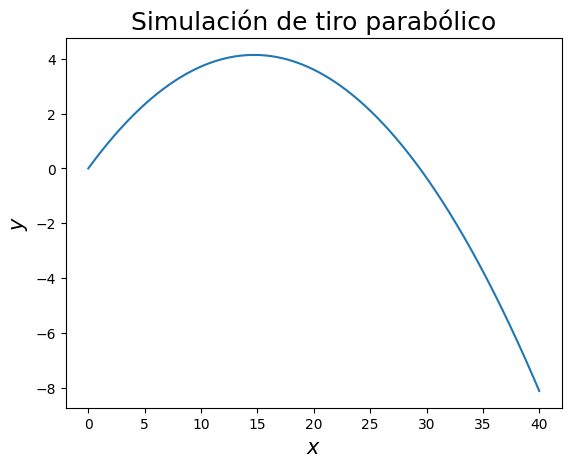

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as sci

Nsteps=2501 # Indica el indice del último elemento

xdata=np.zeros(Nsteps)
ydata=np.zeros(Nsteps)

f = open('datos.dat', 'r')
i=0
for line in f:
    line = line.strip()
    columns = line.split()
    xdata[i] = float(columns[0])
    ydata[i] = float(columns[1])
    i+=1
f.close()


plt.plot(xdata,ydata)
plt.xlabel("$x$",size=15)
plt.ylabel("$y$",size=15)
plt.title("Simulación de tiro parabólico",size=18)
plt.show()

Podemos simplificar aún más la manera en la que construimos toda esta dinámica, haciendo uso directamente de las herramientas del cálculo y álgebra entre vectores. La librería **vector.h** establece unas reglas para construir vectores y operar con ellos, por lo que podemos incluirla en nuestro código para simplificarlo:

In [ ]:
%%writefile Balon_con_vectorh.cpp

// Librerías y nombre de espacio:

#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;

// Constantes globales:

const double g=9.8;

//-----------------------------------------------------------------------------------------

// Declaración de la clase:

class Cuerpo;

// Declaración de la interfase (clase y funciones):

class Cuerpo{
  private:
    vector3D r, V, F; double m, R;
  public:
    void Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0, double m0, double R0);
    void CalculeFuerza(void);
    void Muevase(double dt);
    double Getx(void){return r.x();};   // Inline
    double Gety(void){return r.y();};   // Inline
};

// Implementación de las funciones:

void Cuerpo::Inicie(double x0, double y0, double z0, double Vx0, double Vy0, double Vz0, double m0, double R0){
  r.load(x0,y0,z0); V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::CalculeFuerza(void){
  F.load(0,-m*g,0);
}
void Cuerpo::Muevase(double dt){
  // Algoritmo de Euler
  r+=V*dt;  V+=F*(dt/m);
}

// Funciones globales:

int main(){
  double t, dt=0.001;
  Cuerpo Balon;
  // Condiciones iniciales (x0, y0, z0, Vx0, Vy0, Vz0, m0, R0):
  Balon.Inicie(0, 0, 0, 16, 9, 0, 0.453, 0.11);
  // Instrucciones:
  for(t=0; t<2.5; t+=dt){
    cout<<Balon.Getx()<<" "<<Balon.Gety()<<endl;
    Balon.CalculeFuerza();
    Balon.Muevase(dt);
  }
  return 0;
}

Overwriting Balon_con_vectorh.cpp


In [ ]:
!g++ Balon_con_vectorh.cpp && ./a.out > datosvector.dat

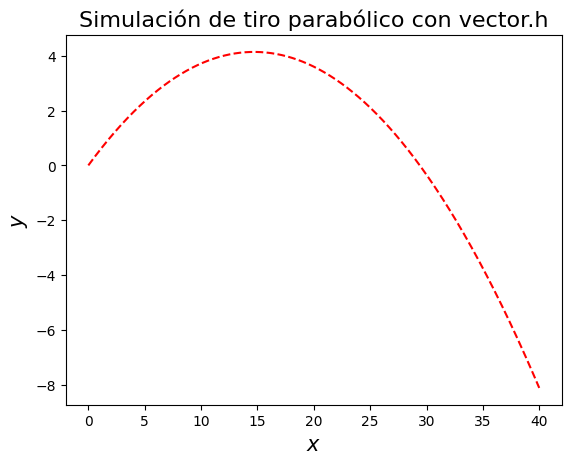

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as sci

Nsteps=2501 # Indica el indice del último elemento

xdata=np.zeros(Nsteps)
ydata=np.zeros(Nsteps)

f = open('datosvector.dat', 'r')
i=0
for line in f:
    line = line.strip()
    columns = line.split()
    xdata[i] = float(columns[0])
    ydata[i] = float(columns[1])
    i+=1
f.close()


plt.plot(xdata,ydata, '--r')
plt.xlabel("$x$",size=15)
plt.ylabel("$y$",size=15)
plt.title("Simulación de tiro parabólico con vector.h",size=16)
plt.show()

**EN PYTHON:**

Ahora, vamos a implementar este programa en Python:

In [ ]:
# Librerías y variables globales

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as sci
g = 9.8
Deltat = 0.01
Nsteps = 250

In [ ]:
# Creación de la clase Cuerpo:

class Cuerpo:
  def __init__(self,x0,y0,z0,Vx0,Vy0,Vz0,m0):    # En Python, podemos definir las condiciones iniciales utilizando la función '__init__()'. La palabra 'self' indica que construiré una lista de datos
    self.m = m0
    self.r = np.array([x0,y0,z0])
    self.V = np.array([Vx0,Vy0,Vz0])
  def CalculeFuerza(self):
    self.F = np.array([0,-self.m*g,0])
  def Muevase(self,dt):
    self.r = self.r+self.V*dt
    self.V = self.V+self.F*(dt/self.m)

In [ ]:
# Programa principal:

xdata = np.zeros(Nsteps)
ydata = np.zeros(Nsteps)
Balon = Cuerpo(x0=0,y0=0,z0=0,Vx0=16,Vy0=9,Vz0=0,m0=0.453)    # Creamos el ejemplar 'Balon' de la clase 'Cuerpo'
for i in range (Nsteps):
  t = i*Deltat
  xdata[i] = Balon.r[0]
  ydata[i] = Balon.r[1]
  Balon.CalculeFuerza()
  Balon.Muevase(Deltat)

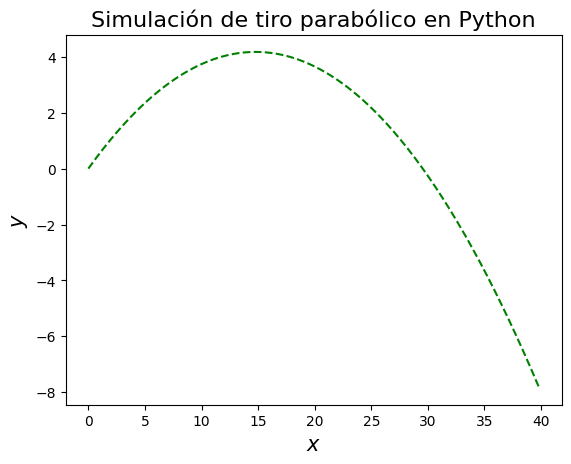

In [ ]:
# Graficamos:

plt.plot(xdata,ydata, '--g')
plt.xlabel("$x$",size=15)
plt.ylabel("$y$",size=15)
plt.title("Simulación de tiro parabólico en Python",size=16)
plt.show()

<ipython-input-41-5b2c281f1a2e>:12: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


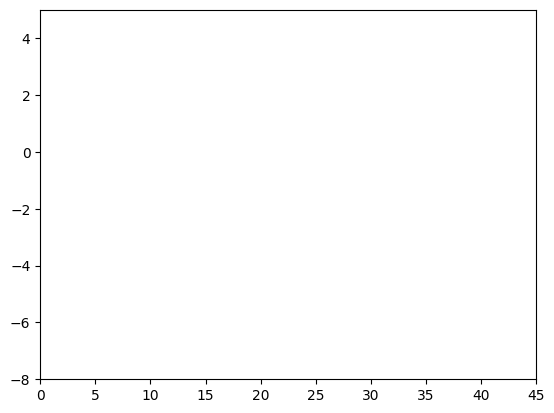

In [ ]:
# Hagamos ahora una animación:

fig = plt.figure()
ax = plt.axes(xlim=(0,45), ylim=(-8.0,5.0))
line, = ax.plot([], [], 'o')
def init():
  line.set_data([], [])
  return line,
def animate(i):
  x=xdata[i]
  y=ydata[i]
  line.set_data(x, y)
  return line,
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nsteps, interval=20, blit=False)
anim.save('BalonAnimado.mp4', fps=30)

# Simulación de una fuerza central: un planeta orbitando

In [ ]:
# Librerías y variables globales

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as sci
GM = 1.0
Deltat = 0.001
Nsteps = 400000
r = 10
omega = np.sqrt(GM/(r**3))
V0 = omega*r
T = 2*np.pi/omega

In [ ]:
# Creación de la clase Cuerpo:

class Cuerpo:
  def __init__(self,x0,y0,z0,Vx0,Vy0,Vz0,m0):
    self.m = m0
    self.r = np.array([x0,y0,z0])
    self.V = np.array([Vx0,Vy0,Vz0])
  def CalculeFuerza(self):
    self.F = (-GM*self.m*np.linalg.norm(self.r)**(-3))*self.r   # 'F' y 'r' son vectores proporcionales entre sí
  def Muevase(self,dt):
    self.r = self.r+self.V*dt
    self.V = self.V+self.F*(dt/self.m)

In [ ]:
# Programa principal:

xdata = np.zeros(Nsteps)
ydata = np.zeros(Nsteps)
Planeta = Cuerpo(x0=r,y0=0,z0=0,Vx0=0,Vy0=0.5*V0,Vz0=0,m0=0.453)    # Creamos el ejemplar 'Balon' de la clase 'Cuerpo'
for i in range (Nsteps):
  t = i*Deltat
  xdata[i] = Planeta.r[0]
  ydata[i] = Planeta.r[1]
  Planeta.CalculeFuerza()
  Planeta.Muevase(Deltat)

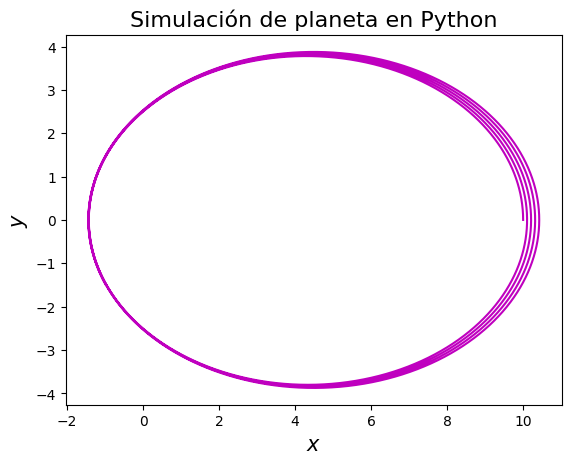

In [ ]:
# Graficamos:

plt.plot(xdata,ydata, 'm')
plt.xlabel("$x$",size=15)
plt.ylabel("$y$",size=15)
plt.title("Simulación de planeta en Python",size=16)
plt.show()